In [87]:
import awkward as ak
import uproot
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import os, sys

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
plt.style.use(hep.style.ROOT)

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

#line thickness
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 5

sys.path.append('../../')

from boostedhiggs.corrections import (
    corrected_msoftdrop,
    n2ddt_shift,
    add_pileup_weight,
    add_HiggsEW_kFactors,
    add_VJets_kFactors,
    add_jetTriggerSF,
    add_muonSFs,
    jet_factory,
    fatjet_factory,
    add_jec_variables,
    met_factory,
    lumiMasks,

    # Jennet adds theory variations                                                                                                
    add_ps_weight,
    add_scalevar_7pt,
    add_scalevar_3pt,
    add_pdf_weight,
)



FileNotFoundError: [Errno 2] No such file or directory: 'boostedhiggs/data/ddtmap_n2b1_UL.coffea'

In [59]:
ttbar_path='root://cmsxrootd.fnal.gov//store/group/lpcpfnano/jdickins/v2_3/2017/TTbarBoosted/TT_Mtt-700to1000_TuneCP5_13TeV-powheg-pythia8/TT_MTT700To1000/220809_162200/0000/nano_mc2017_2-80.root'
qcd_path='root://cmsxrootd.fnal.gov//store/user/lpcpfnano/cmantill/v2_3/2017/QCD/QCD_HT1500to2000_TuneCP5_PSWeights_13TeV-madgraph-pythia8/QCD_HT1500to2000/220808_164504/0000/nano_mc2017_101.root'
ZH_path='root://cmsxrootd.fnal.gov//store/user/lpcpfnano/cmantill/v2_3/2017/HToBB/ZH_HToBB_ZToQQ_M-125_TuneCP5_13TeV-powheg-pythia8/ZH_HToBB_ZToQQ/230217_201213/0000/nano_mc2017_61.root'
WH_path='root://cmsxrootd.fnal.gov//store/user/lpcpfnano/cmantill/v2_3/2017/HToBB/WplusH_HToBB_WToQQ_M-125_TuneCP5_13TeV-powheg-pythia8/WplusH_HToBB_WToQQ/230217_201113/0000/nano_mc2017_29.root'

In [60]:
ttbar_events = NanoEventsFactory.from_root(ttbar_path, schemaclass=NanoAODSchema).events()
qcd_events = NanoEventsFactory.from_root(qcd_path, schemaclass=NanoAODSchema).events()
ZH_events = NanoEventsFactory.from_root(ZH_path, schemaclass=NanoAODSchema).events()
WH_events = NanoEventsFactory.from_root(WH_path, schemaclass=NanoAODSchema).events()

/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJetAK15SubJet_nBHadrons in <TTree 'Events' (1975 branches) at 0x7f47f3b506d0>, taking first instance
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJetAK15SubJet_nCHadrons in <TTree 'Events' (1975 branches) at 0x7f47f3b506d0>, taking first instance
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJetAK15_nBHadrons in <TTree 'Events' (1975 branches) at 0x7f47f3b506d0>, taking first instance
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJetAK15_nCHadrons in <TTree 'Events' (1975 branches) at 0x7f47f3b506d0>, taking first instance
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/mapping/upr

In [32]:
def select_leading_jets(events):

    fatjets = events.FatJet

    candidatejets = fatjets[(fatjets.pt > 200)
                           & (abs(fatjets.eta) < 2.5)
                           & fatjets.isTight
                          ]
    
    leadingjets = candidatejets[:, 0:2]

    pnet_bvc = leadingjets.particleNetMD_Xbb / (leadingjets.particleNetMD_Xcc + leadingjets.particleNetMD_Xbb)
    
    #Higher b score for the Higgs candidate (more b like)                                                                                                                           
    indices = ak.argsort(pnet_bvc, axis=1, ascending = False) 

    # candidate jet is more b-like (higher BvC score)                                                                                                           
    candidatejet = ak.firsts(leadingjets[indices[:, 0:1]])
    
    # second jet is more charm-like (larger BvC score)                                                                                                           
    secondjet = ak.firsts(leadingjets[indices[:, 1:2]])

    n2_cut = 

    selection = n2_cut & 

    return candidatejet, secondjet

def check_not_none(a):
    print(len(a[~ak.is_none(a)]))
    
def return_not_none(a):
    return a[~ak.is_none(a)]

def calculate_tt2(secondjet):

    t2 = (secondjet.particleNet_TvsQCD*secondjet.particleNet_QCD) / (1. - secondjet.particleNet_TvsQCD)
    w2 = (secondjet.particleNet_WvsQCD*secondjet.particleNet_QCD) / (1. - secondjet.particleNet_WvsQCD)
    z2 = (secondjet.particleNet_ZvsQCD*secondjet.particleNet_QCD) / (1. - secondjet.particleNet_ZvsQCD)
    
    tt2 = (w2+z2)/(t2+w2+z2)

    return tt2
    

In [61]:
len(ttbar_jet2)

34712

In [67]:
ttbar_jet1, ttbar_jet2 = select_leading_jets(ttbar_events)
qcd_jet1, qcd_jet2 = select_leading_jets(qcd_events)
ZH_jet1, ZH_jet2 = select_leading_jets(ZH_events)
WH_jet1, WH_jet2 = select_leading_jets(WH_events)

In [68]:
ttbar_tt2 = return_not_none(calculate_tt2(ttbar_jet2))
qcd_tt2 = return_not_none(calculate_tt2(qcd_jet2))
ZH_tt2 = return_not_none(calculate_tt2(ZH_jet2))
WH_tt2 = return_not_none(calculate_tt2(WH_jet2))

In [69]:
ttbar_tt1 = return_not_none(calculate_tt2(ttbar_jet1))
qcd_tt1 = return_not_none(calculate_tt2(qcd_jet1))
ZH_tt1 = return_not_none(calculate_tt2(ZH_jet1))
WH_tt1 = return_not_none(calculate_tt2(WH_jet1))

Text(1, 0, 'Particle Net W+Z Score')

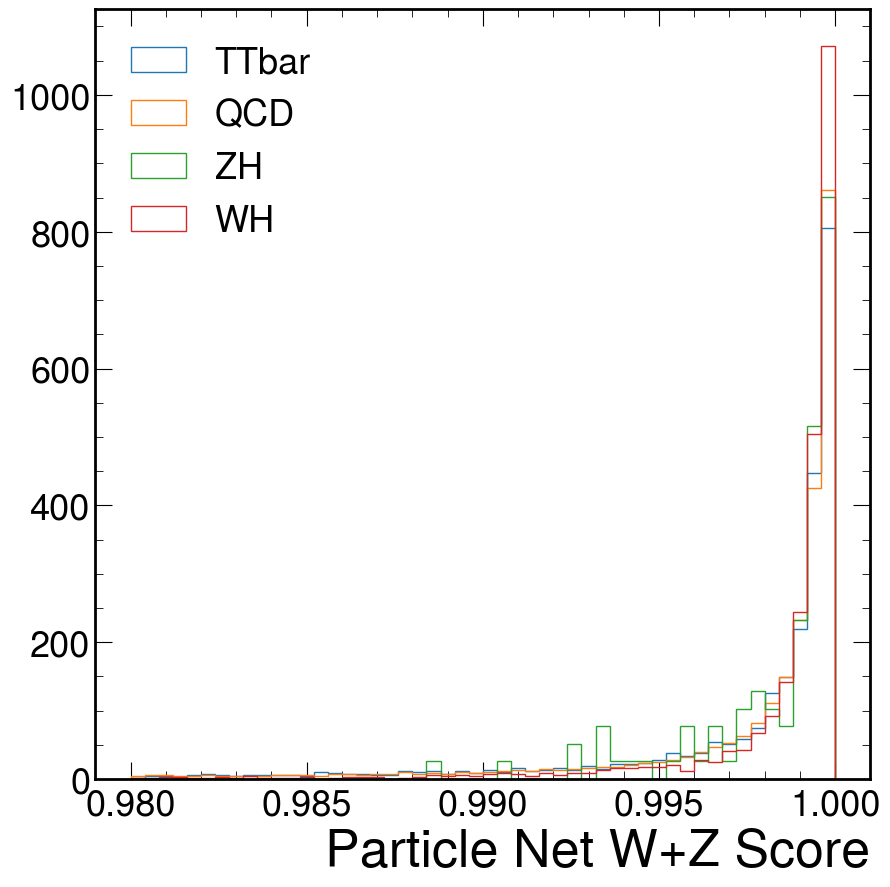

In [37]:
bins=50
plt.hist(ttbar_tt2, histtype='step',bins=bins,label='TTbar', density=True, range=(0.98,1))
plt.hist(qcd_tt2, histtype='step',bins=bins,label='QCD', density=True, range=(0.98,1))
plt.hist(ZH_tt2, histtype='step',bins=bins,label='ZH', density=True, range=(0.98,1))
plt.hist(WH_tt2, histtype='step',bins=bins,label='WH', density=True, range=(0.98,1))
plt.legend(frameon=False)
plt.xlabel('Particle Net W+Z Score')

Text(1, 0, 'Particle Net W+Z Score')

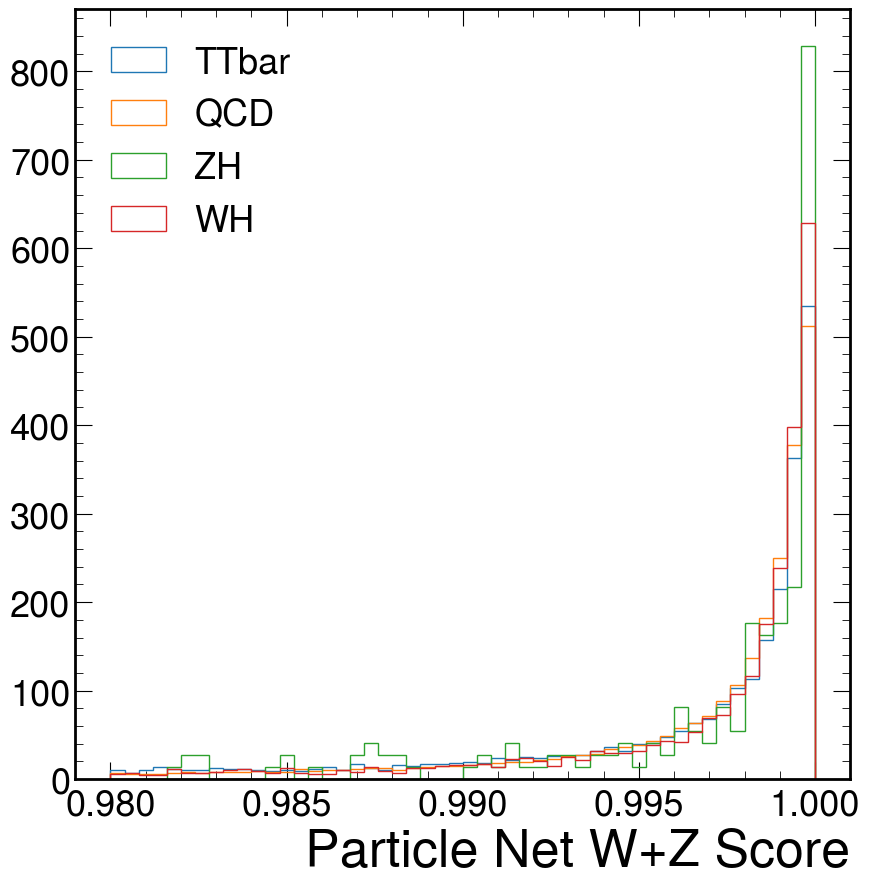

In [70]:
bins=50
plt.hist(ttbar_tt1, histtype='step',bins=bins,label='TTbar', density=True, range=(0.98,1))
plt.hist(qcd_tt1, histtype='step',bins=bins,label='QCD', density=True, range=(0.98,1))
plt.hist(ZH_tt1, histtype='step',bins=bins,label='ZH', density=True, range=(0.98,1))
plt.hist(WH_tt1, histtype='step',bins=bins,label='WH', density=True, range=(0.98,1))
plt.legend(frameon=False)
plt.xlabel('Particle Net W+Z Score')

Text(1, 0, 'Particle Net T vs QCD Score')

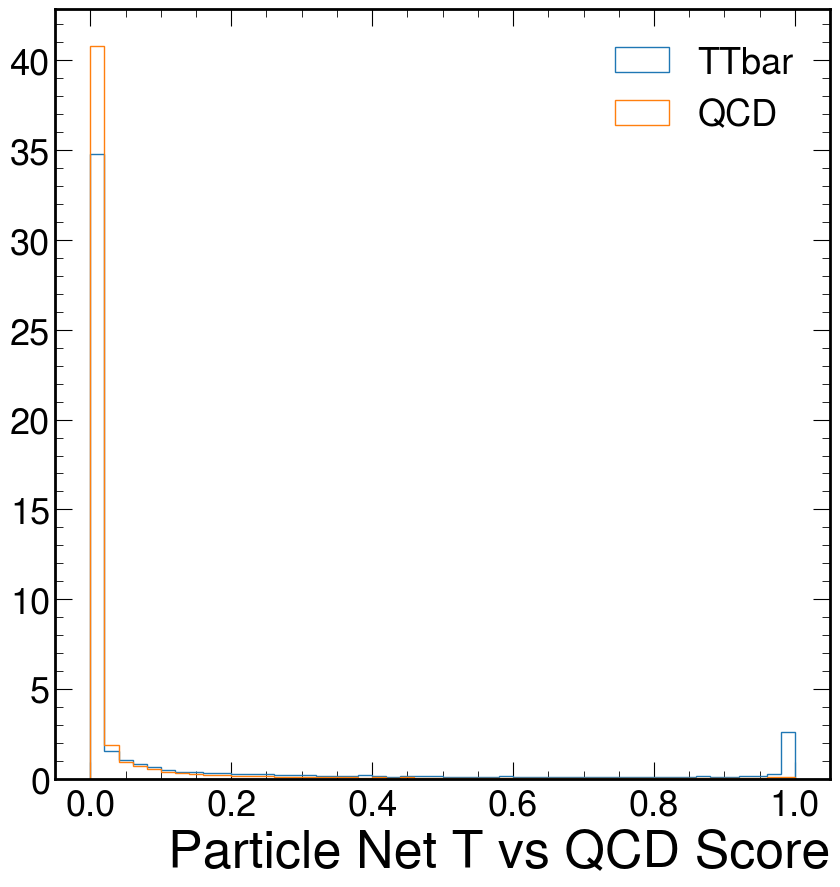

In [71]:
bins=50
range_plot = (0,1)
plt.hist(ttbar_jet1.particleNet_TvsQCD, histtype='step',bins=bins,label='TTbar', density=True, range=range_plot)
plt.hist(qcd_jet1.particleNet_TvsQCD, histtype='step',bins=bins,label='QCD', density=True, range=range_plot)
# plt.hist(ZH_jet2.particleNet_TvsQCD, histtype='step',bins=bins,label='ZH', density=True, range=range_plot)
# plt.hist(WH_jet2.particleNet_TvsQCD, histtype='step',bins=bins,label='WH', density=True, range=range_plot)
plt.legend(frameon=False)
plt.xlabel('Particle Net T vs QCD Score')

Text(1, 0, 'Deep Tag T vs QCD Score')

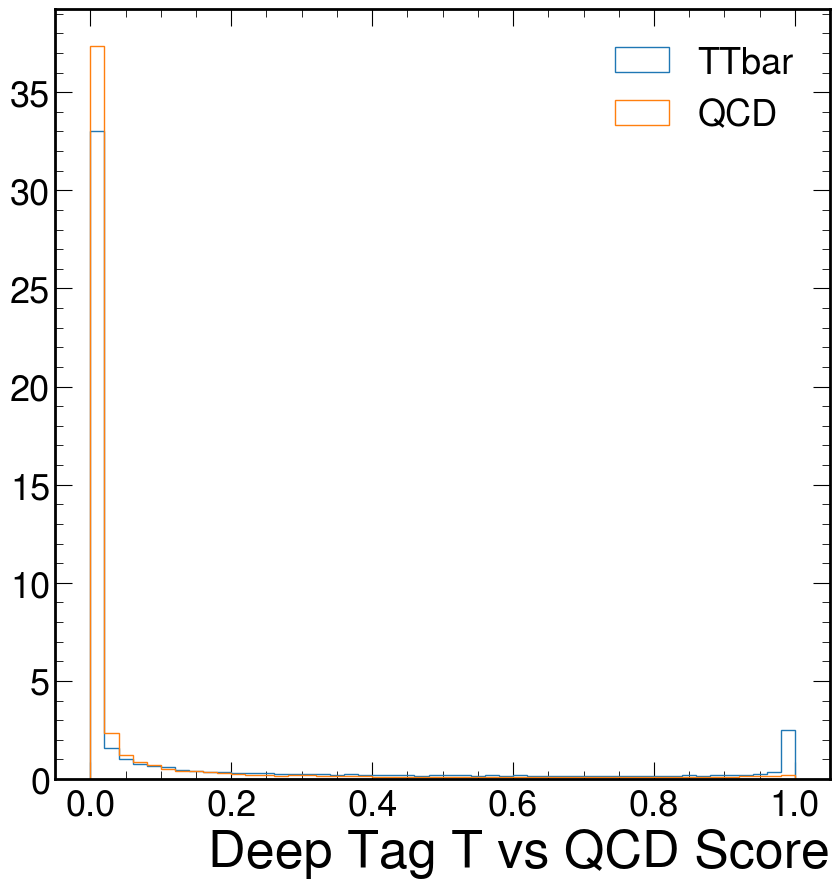

In [72]:
bins=50
range_plot = (0,1)
plt.hist(ttbar_jet1.deepTag_TvsQCD, histtype='step',bins=bins,label='TTbar', density=True, range=range_plot)
plt.hist(qcd_jet1.deepTag_TvsQCD, histtype='step',bins=bins,label='QCD', density=True, range=range_plot)
# plt.hist(ZH_jet2.deepTag_TvsQCD, histtype='step',bins=bins,label='ZH', density=True, range=range_plot)
# plt.hist(WH_jet2.deepTag_TvsQCD, histtype='step',bins=bins,label='WH', density=True, range=range_plot)
plt.legend(frameon=False)
plt.xlabel('Deep Tag T vs QCD Score')

Text(1, 0, 'Deep Tag T vs QCD Score')

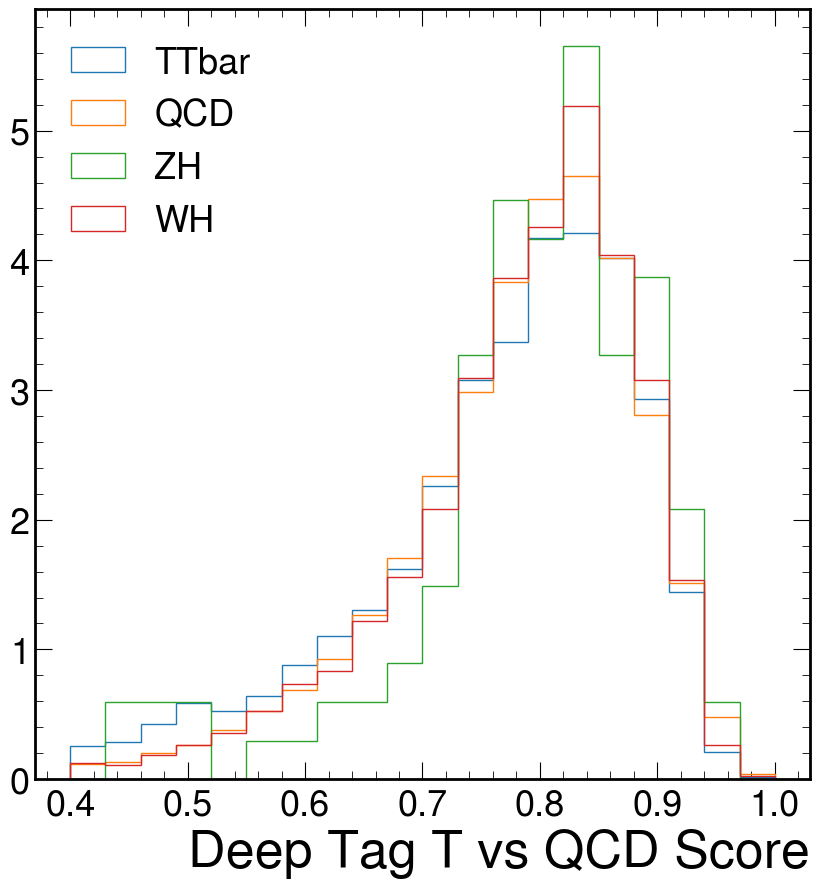

In [50]:
bins=20
range_plot = (0.4,1)
plt.hist(ttbar_jet2.tau3/ttbar_jet2.tau2, histtype='step',bins=bins,label='TTbar', density=True, range=range_plot)
plt.hist(qcd_jet2.tau3/qcd_jet2.tau2, histtype='step',bins=bins,label='QCD', density=True, range=range_plot)
plt.hist(ZH_jet2.tau3/ZH_jet2.tau2, histtype='step',bins=bins,label='ZH', density=True, range=range_plot)
plt.hist(WH_jet2.tau3/WH_jet2.tau2, histtype='step',bins=bins,label='WH', density=True, range=range_plot)
plt.legend(frameon=False)
plt.xlabel('Deep Tag T vs QCD Score')

Text(1, 0, 'Deep Tag T vs QCD Score')

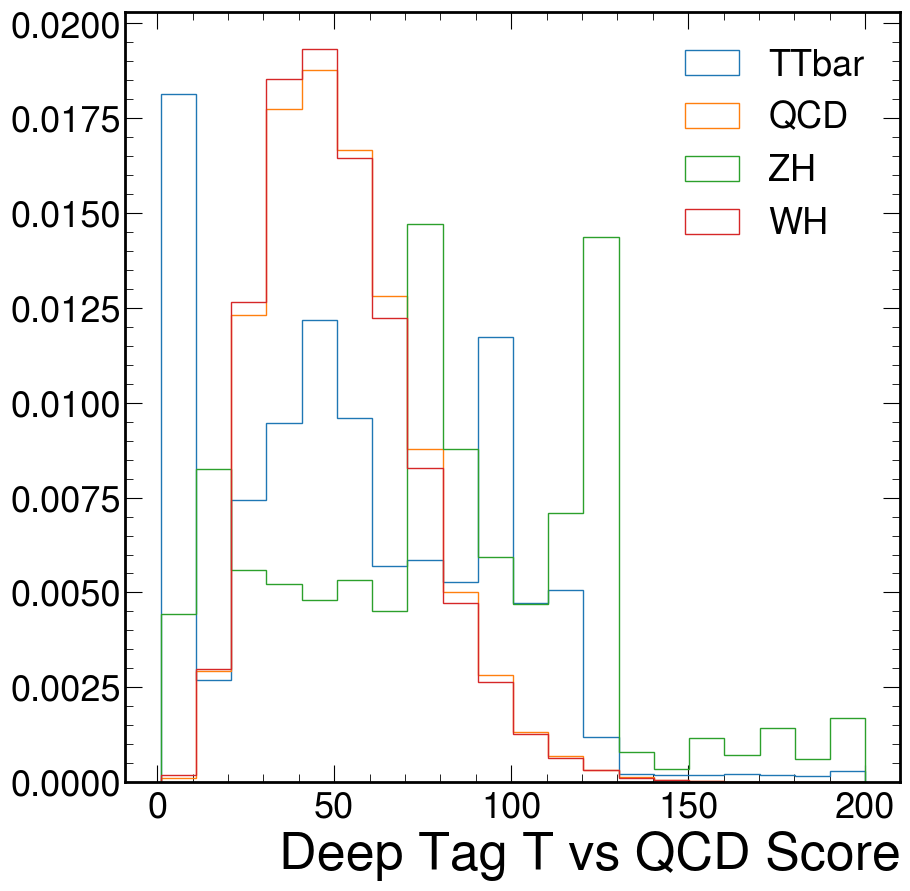

In [56]:
bins=20
range_plot = (1,200)
plt.hist(ttbar_jet2.nConstituents, histtype='step',bins=bins,label='TTbar', density=True, range=range_plot)
plt.hist(qcd_jet2.nConstituents, histtype='step',bins=bins,label='QCD', density=True, range=range_plot)
plt.hist(ZH_jet2.nConstituents, histtype='step',bins=bins,label='ZH', density=True, range=range_plot)
plt.hist(WH_jet2.nConstituents, histtype='step',bins=bins,label='WH', density=True, range=range_plot)
plt.legend(frameon=False)
plt.xlabel('Deep Tag T vs QCD Score')

In [6]:
fatjets = events.FatJet

candidatejet = fatjets[(fatjets.pt > 200)
                       & (abs(fatjets.eta) < 2.5)
                       & fatjets.isTight
                      ]

leadingjets = candidatejet[:, 0:2]
            

In [7]:
particleNetMD_Xbb = leadingjets.particleNetMD_Xbb
particleNetMD_Xcc = leadingjets.particleNetMD_Xcc
particleNetMD_Xqq = leadingjets.particleNetMD_Xqq
particleNetMD_QCD = leadingjets.particleNetMD_QCD

# ascending = true                                                                                                                                
indices = ak.argsort(particleNetMD_Xbb,axis=1)

# candidate jet is more b-like (lower CvB score)                                                                                                           
candidatejet = return_not_none(ak.firsts(leadingjets[indices[:, 1:2]]))
            
# second jet is more charm-like (larger CvB score)                                                                                                           
secondjet = return_not_none(ak.firsts(leadingjets[indices[:, 0:1]]))

In [8]:
ddcvb = leadingjets.btagDDCvBV2

# ascending = true                                                                                                                                
indices = ak.argsort(ddcvb,axis=1)

# candidate jet is more b-like (lower CvB score)                                                                                                           
candidatejet_old = ak.firsts(leadingjets[indices[:, 1:2]])
            
# second jet is more charm-like (larger CvB score)                                                                                                           
secondjet_old = ak.firsts(leadingjets[indices[:, 0:1]])

In [9]:
bins=np.linspace(0,1,11)

Text(1, 0, 'particleNetMD')

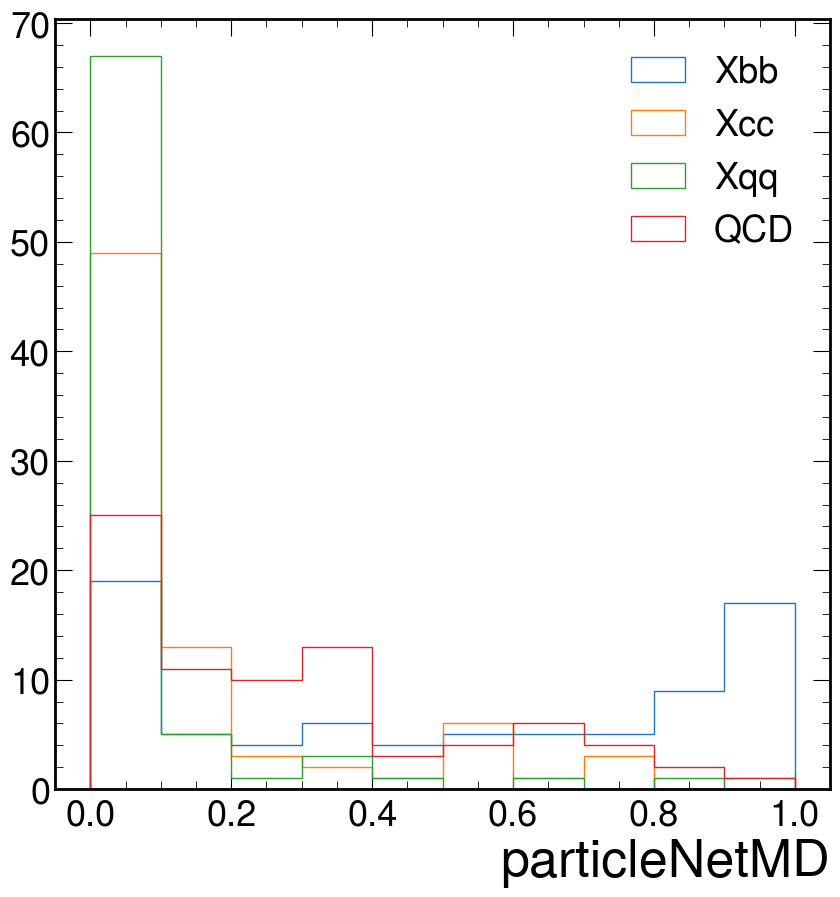

In [10]:
particleNetMD_Xbb = candidatejet.particleNetMD_Xbb
particleNetMD_Xcc = candidatejet.particleNetMD_Xcc
particleNetMD_Xqq = candidatejet.particleNetMD_Xqq
particleNetMD_QCD = candidatejet.particleNetMD_QCD

plt.hist(particleNetMD_Xbb,histtype='step',bins=bins,label='Xbb');
plt.hist(particleNetMD_Xcc,histtype='step',bins=bins,label='Xcc');
plt.hist(particleNetMD_Xqq,histtype='step',bins=bins,label='Xqq');
plt.hist(particleNetMD_QCD,histtype='step',bins=bins,label='QCD');
plt.legend(frameon=False)
plt.xlabel('particleNetMD')

Text(1, 0, 'Transformed particleNetMD')

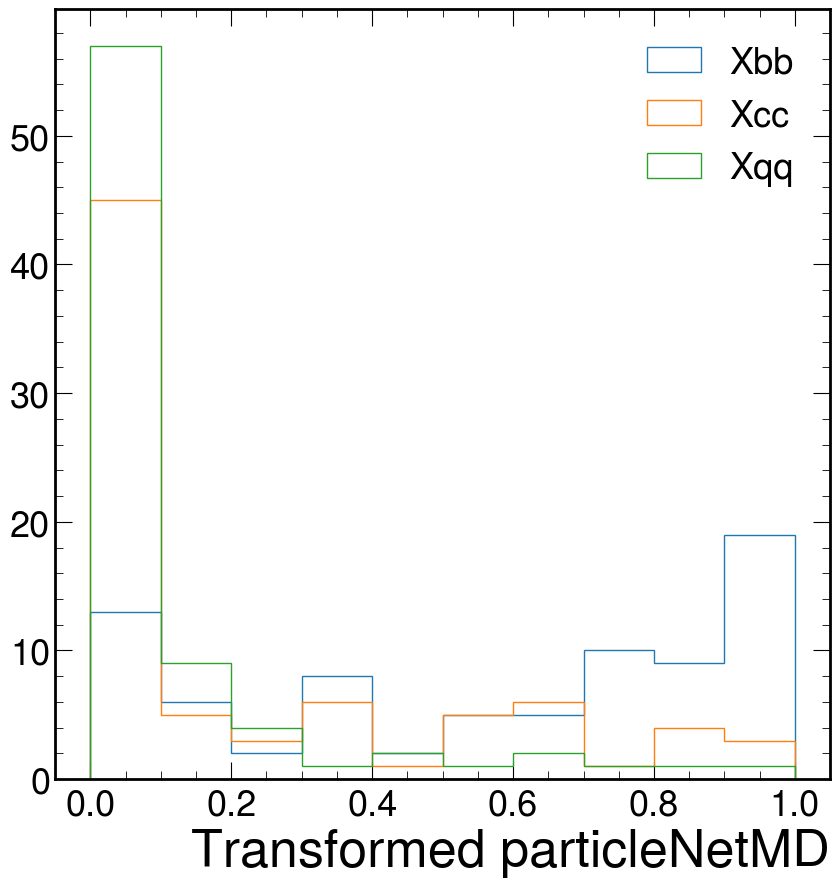

In [11]:
plt.hist(particleNetMD_Xbb / (1 - particleNetMD_Xcc - particleNetMD_Xqq),histtype='step',bins=bins,label='Xbb');
plt.hist(particleNetMD_Xcc / (1 - particleNetMD_Xbb - particleNetMD_Xqq),histtype='step',bins=bins,label='Xcc');
plt.hist(particleNetMD_Xqq / (1 - particleNetMD_Xbb - particleNetMD_Xcc),histtype='step',bins=bins,label='Xqq');
#plt.hist(particleNetMD_QCD / (particleNetMD_Xbb + particleNetMD_QCD + particleNetMD_Xcc + particleNetMD_Xqq),histtype='step',bins=bins,label='QCD');
plt.legend(frameon=False)
plt.xlabel('Transformed particleNetMD')

Text(1, 0, 'particleNet')

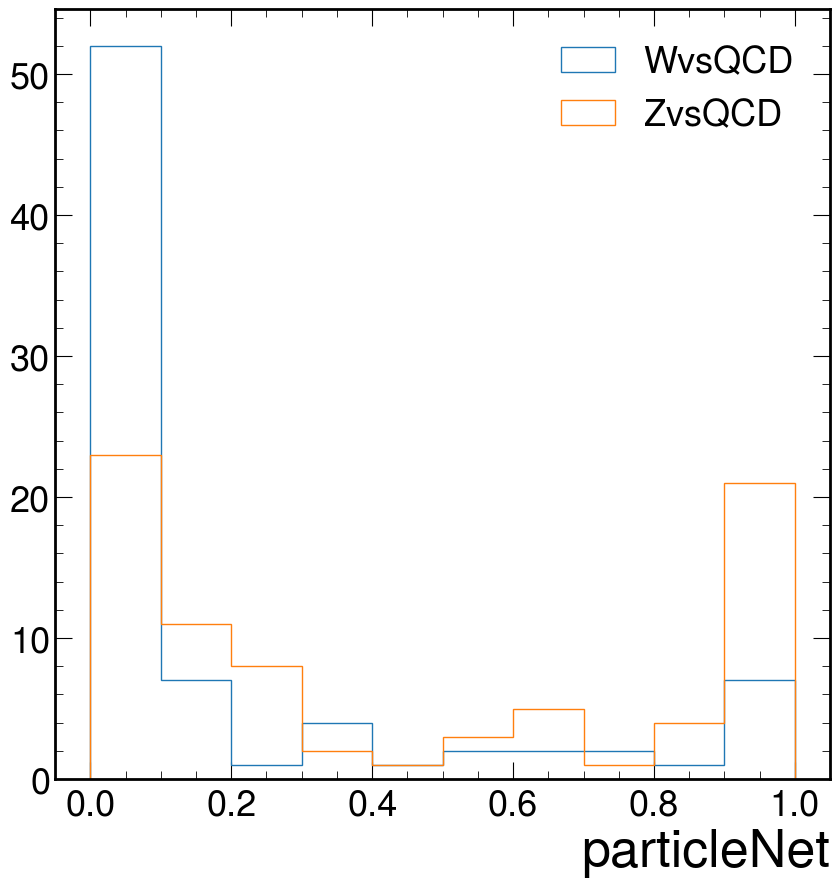

In [12]:
plt.hist(candidatejet.particleNet_WvsQCD,histtype='step',bins=bins,label='WvsQCD');
plt.hist(candidatejet.particleNet_ZvsQCD,histtype='step',bins=bins,label='ZvsQCD');
plt.legend(frameon=False)
plt.xlabel('particleNet')

Text(1, 0, 'particleNetMD')

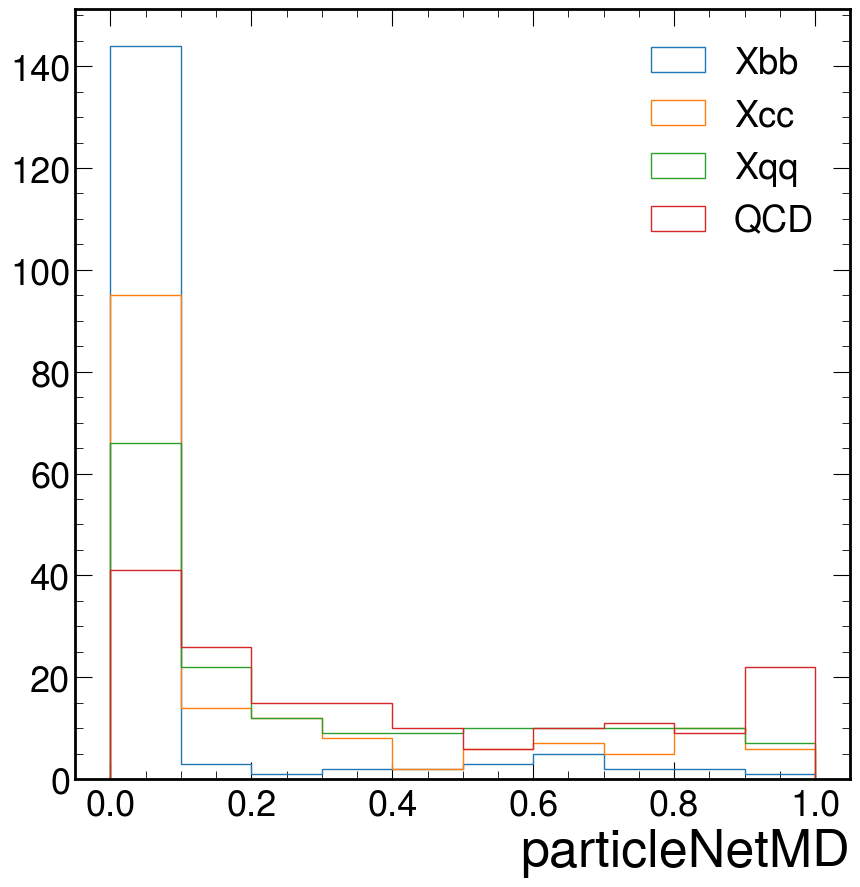

In [13]:
particleNetMD_Xbb = secondjet.particleNetMD_Xbb
particleNetMD_Xcc = secondjet.particleNetMD_Xcc
particleNetMD_Xqq = secondjet.particleNetMD_Xqq
particleNetMD_QCD = secondjet.particleNetMD_QCD

plt.hist(particleNetMD_Xbb,histtype='step',bins=bins,label='Xbb');
plt.hist(particleNetMD_Xcc,histtype='step',bins=bins,label='Xcc');
plt.hist(particleNetMD_Xqq,histtype='step',bins=bins,label='Xqq');
plt.hist(particleNetMD_QCD,histtype='step',bins=bins,label='QCD');
plt.legend(frameon=False)
plt.xlabel('particleNetMD')

165
165
165


Text(1, 0, 'Transformed particleNetMD')

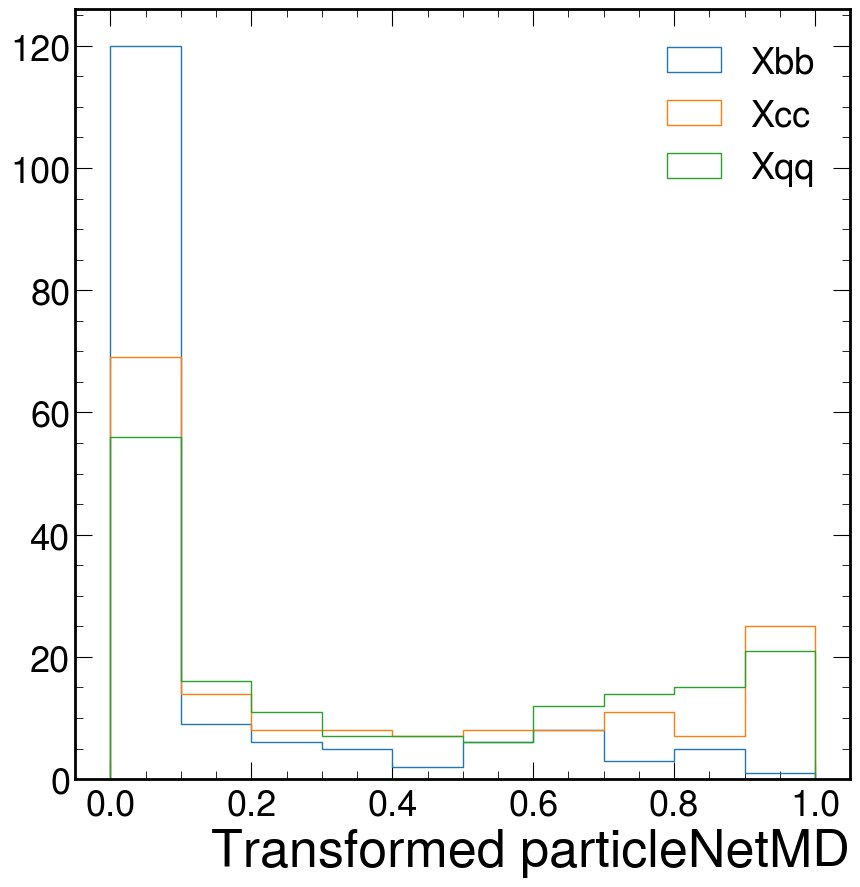

In [14]:
check_not_none(particleNetMD_Xbb / (1 - particleNetMD_Xcc - particleNetMD_Xqq))
check_not_none(particleNetMD_Xcc / (1 - particleNetMD_Xbb - particleNetMD_Xqq))
check_not_none(particleNetMD_Xqq / (1 - particleNetMD_Xbb - particleNetMD_Xcc))

plt.hist(particleNetMD_Xbb / (1 - particleNetMD_Xcc - particleNetMD_Xqq),histtype='step',bins=bins,label='Xbb');
plt.hist(particleNetMD_Xcc / (1 - particleNetMD_Xbb - particleNetMD_Xqq),histtype='step',bins=bins,label='Xcc');
plt.hist(particleNetMD_Xqq / (1 - particleNetMD_Xbb - particleNetMD_Xcc),histtype='step',bins=bins,label='Xqq');
#plt.hist(particleNetMD_QCD / (particleNetMD_Xbb + particleNetMD_QCD + particleNetMD_Xcc + particleNetMD_Xqq),histtype='step',bins=bins,label='QCD');
plt.legend(frameon=False)
plt.xlabel('Transformed particleNetMD')

Text(1, 0, 'particleNet')

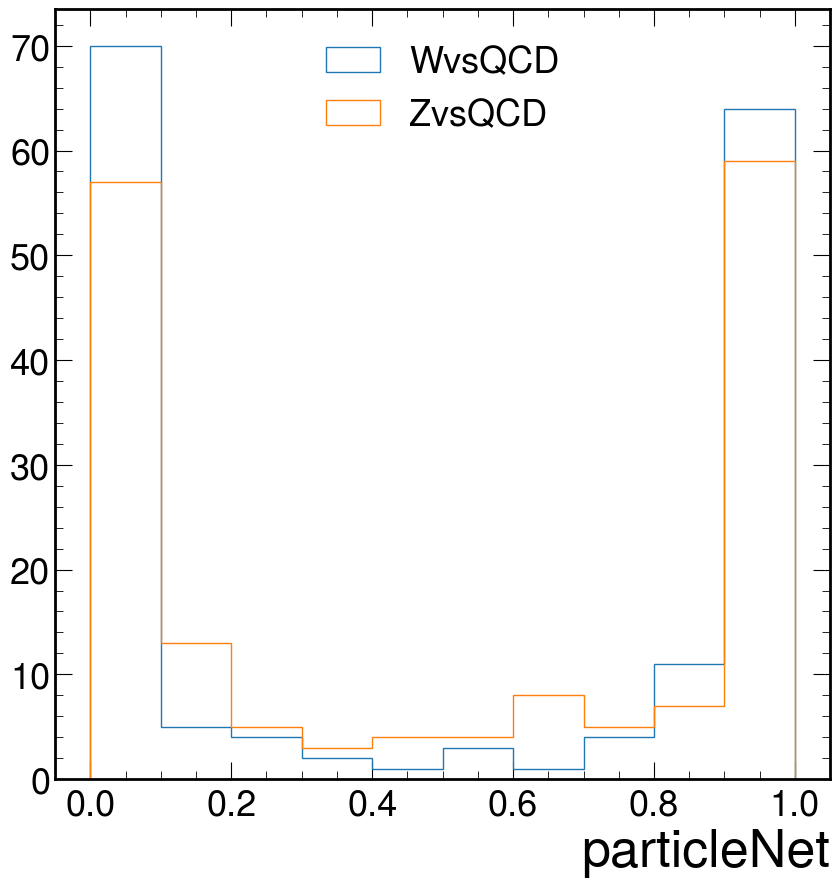

In [15]:
plt.hist(secondjet.particleNet_WvsQCD,histtype='step',bins=bins,label='WvsQCD');
plt.hist(secondjet.particleNet_ZvsQCD,histtype='step',bins=bins,label='ZvsQCD');
plt.legend(frameon=False)
plt.xlabel('particleNet')

(array([ 2.,  4., 11., 39., 17.,  3.,  2.,  0.,  0.,  1.]),
 array([-236.75      , -174.2250061 , -111.69999695,  -49.17499924,
          13.35000038,   75.875     ,  138.3999939 ,  200.92500305,
         263.45001221,  325.9750061 ,  388.5       ]),
 <BarContainer object of 10 artists>)

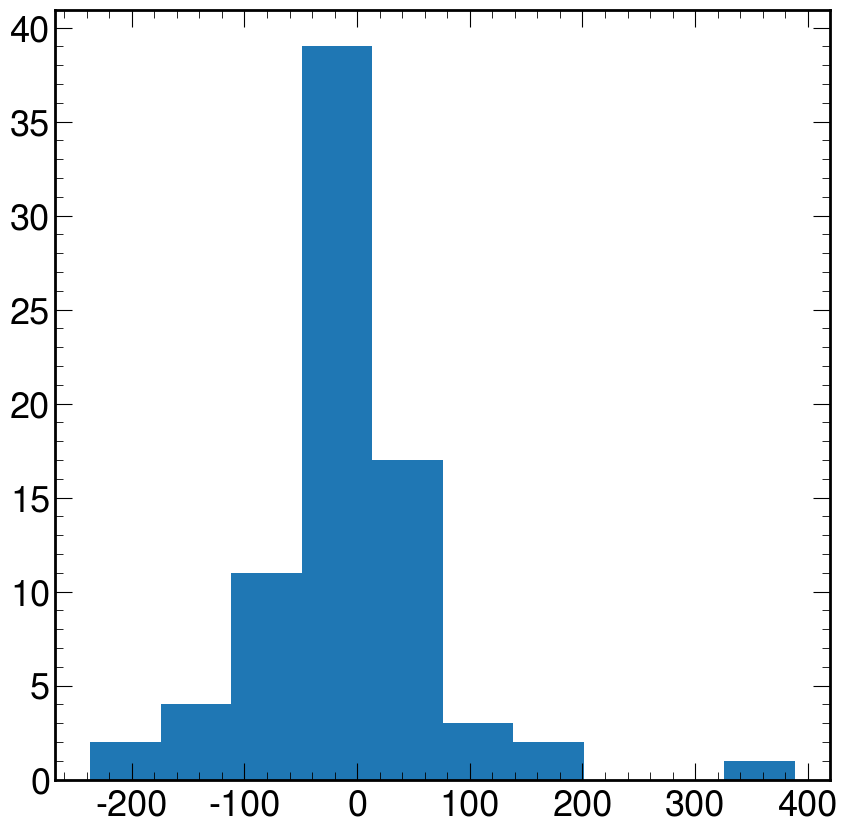

In [16]:
candidatejet_diff = return_not_none(candidatejet.pt) - return_not_none(candidatejet_old.pt)
plt.hist(candidatejet_diff)

(array([  1.,   0.,   0.,   2.,   3.,  17., 125.,  11.,   4.,   2.]),
 array([-388.5       , -325.9750061 , -263.45001221, -200.92500305,
        -138.3999939 ,  -75.875     ,  -13.35000038,   49.17499924,
         111.69999695,  174.2250061 ,  236.75      ]),
 <BarContainer object of 10 artists>)

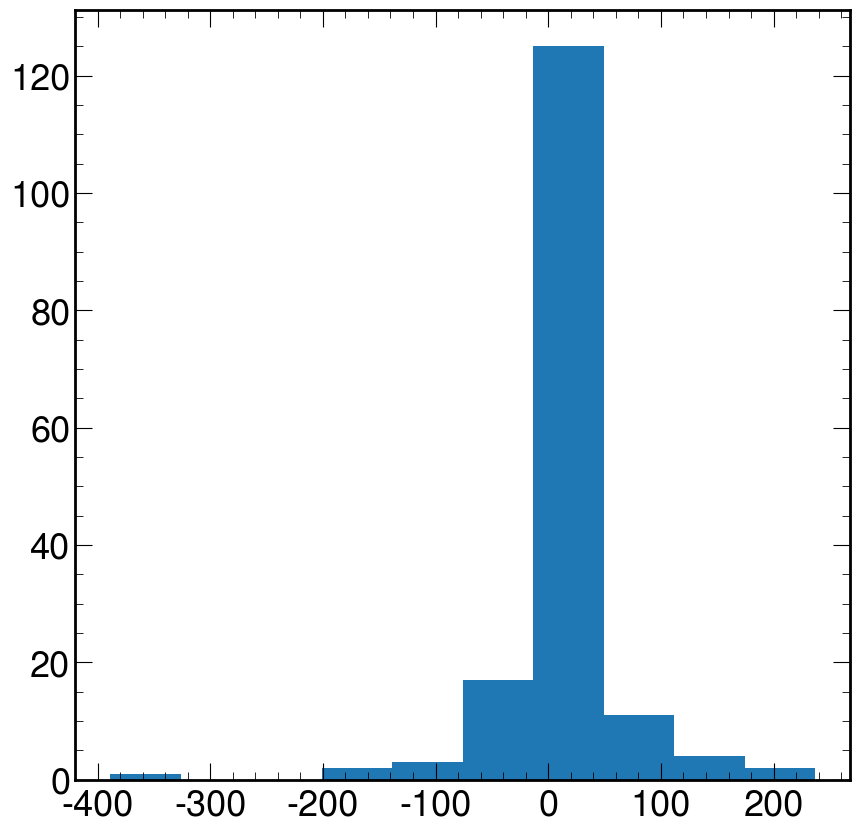

In [17]:
secondjet_diff = return_not_none(secondjet.pt) - return_not_none(secondjet_old.pt)
plt.hist(secondjet_diff)